[*********************100%***********************]  1 of 1 completed


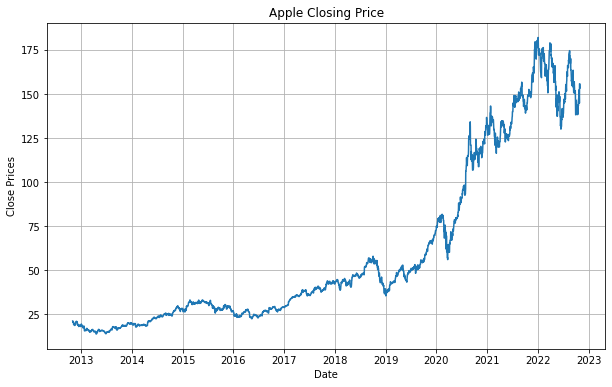

In [44]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

#read data from csv for each stock
aapl_data = yf.download('aapl', start='2012-11-01', end='2022-11-01')
aapl_data = pd.DataFrame(aapl_data)
aapl_data = aapl_data.resample('D').asfreq()
aapl_data = aapl_data.ffill()

def plot_close_price(stock_data, stock_name):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Close Prices')
    plt.plot(aapl_data['Close'])
    plt.title(f'{stock_name} Closing Price')
    plt.show()
plot_close_price(aapl_data, "Apple")


<AxesSubplot:xlabel='Date'>

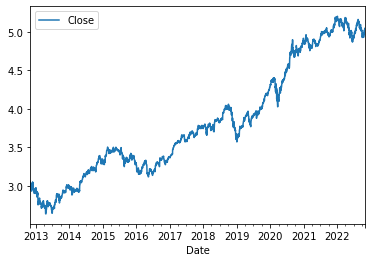

In [45]:

df = aapl_data[['Close']].copy()

df = np.log(df) # don't forget to transform the data back when making real predictions

df.plot()


In [46]:
df_train, df_test = df[:int(len(df)*0.95)], df[int(len(df)*0.95):]


/Users/johnoconnell/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


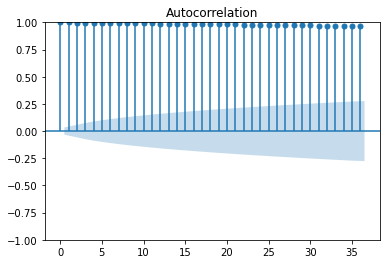

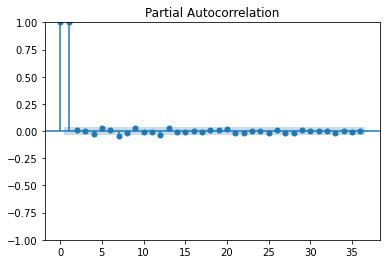

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [48]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.9789531819202921


,Close
Date,
2012-11-01,3.058942
2012-11-02,3.025291
2012-11-03,3.025291
2012-11-04,3.025291
2012-11-05,3.038758
...,...
2022-10-27,4.975354
2022-10-28,5.048188
2022-10-29,5.048188


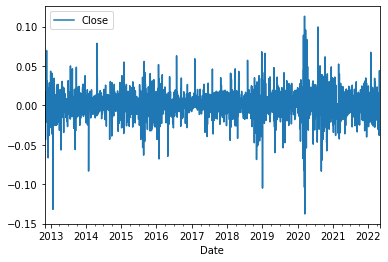

In [49]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()
df

/Users/johnoconnell/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


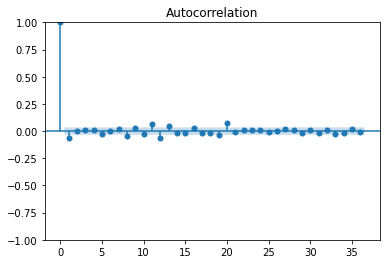

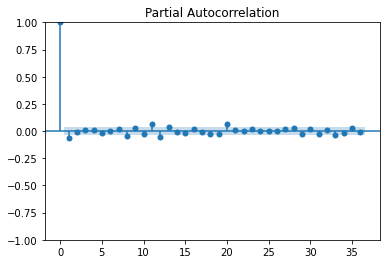

In [50]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [51]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 6.19662488523265e-24


In [52]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3469
Model:                 ARIMA(3, 1, 2)   Log Likelihood                9656.668
Date:                Tue, 13 Dec 2022   AIC                         -19301.336
Time:                        15:47:39   BIC                         -19264.428
Sample:                    11-01-2012   HQIC                        -19288.158
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0528      0.177     -0.298      0.766      -0.400       0.294
ar.L2         -0.8159      0.160     -5.099      0.000      -1.129      -0.502
ar.L3         -0.0337      0.019     -1.757      0.0

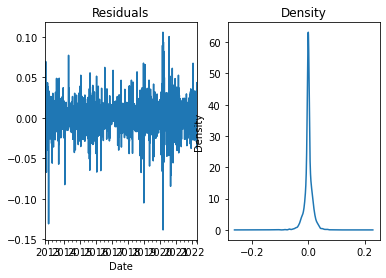

In [53]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/Users/johnoconnell/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


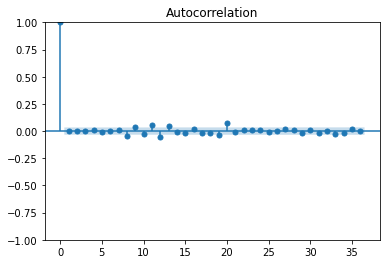

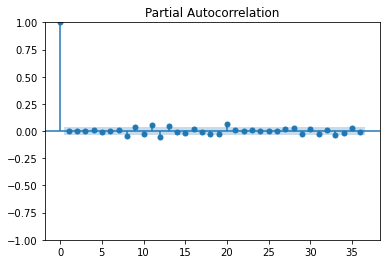

In [54]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

               Close  forecast_manual
Date                                 
2012-11-01  3.058942              NaN
2012-11-02  3.025291              NaN
2012-11-03  3.025291              NaN
2012-11-04  3.025291              NaN
2012-11-05  3.038758              NaN
...              ...              ...
2022-10-27  4.975354         5.059601
2022-10-28  5.048188         5.059601
2022-10-29  5.048188         5.059601
2022-10-30  5.048188         5.059601
2022-10-31  5.032658         5.059601

[3652 rows x 2 columns]


<AxesSubplot:xlabel='Date'>

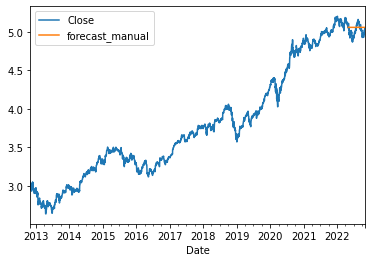

In [55]:

forecast_test = model_fit.forecast(len(df_test))
df

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

print(df)
df.plot()